In [63]:
import pandas as pd 
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df.drop(['PassengerId','Name','SibSp','Parch','Cabin','Embarked','Ticket'], axis= 'columns', inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [65]:
target = df.Survived
inputs = df.drop("Survived", axis= "columns")

In [66]:
dummies =  pd.get_dummies(inputs.Sex).astype(int)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [67]:
inputs = pd.concat([inputs,dummies], axis="columns", )
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [68]:
inputs.drop("Sex", axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [69]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [76]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs = inputs.drop('Sex', axis = 'columns')
inputs.head(5)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [118]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(inputs,target, test_size=0.3)

In [119]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [120]:
model.fit(X_train,y_train)

GaussianNB()

In [121]:
model.score(X_test,y_test)

0.8283582089552238

In [123]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[147,  26],
       [ 20,  75]], dtype=int64)

In [124]:
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline

Text(95.72222222222221, 0.5, 'Actual values')

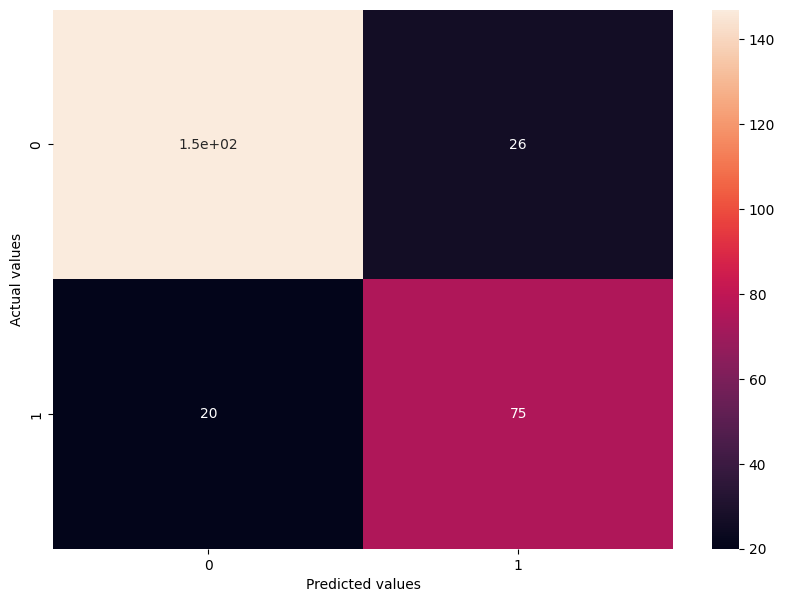

In [125]:
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [126]:
model.predict_proba(X_test[:10])

array([[9.84326303e-01, 1.56736973e-02],
       [9.82505072e-01, 1.74949279e-02],
       [9.44851782e-01, 5.51482182e-02],
       [8.98123689e-01, 1.01876311e-01],
       [9.84852662e-01, 1.51473381e-02],
       [4.46231129e-04, 9.99553769e-01],
       [9.68923875e-01, 3.10761253e-02],
       [9.77729365e-01, 2.22706351e-02],
       [9.84050949e-01, 1.59490508e-02],
       [6.15601532e-02, 9.38439847e-01]])